### When thinking of  KPIs for bike sharing companies, one of the first to come to mind is the average trip duration. Since the rented bicycles are paid for by the minute, it only makes sence for a company to want its customers to make their trips as long as possible. (Well, not longer than 24 hours because then a stolen/lost bike fee of 1200 USD will be charged). Simply put, the longer the trip, the more money the company makes. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
#import datetime
from datetime import date, time, datetime, timedelta

In [27]:
boston = pd.read_csv("boston_2016.csv")

In [28]:
### change boston start_time and end_time from object to datetime, remove microseconds

boston["start_time"] = pd.to_datetime(boston["start_time"])
boston["start_time"] = boston["start_time"].apply(lambda x: x.replace(microsecond = 0))

boston["end_time"] = pd.to_datetime(boston["end_time"])
boston["end_time"] = boston["end_time"].apply(lambda x: x.replace(microsecond = 0))

In [29]:
### add the trip duration as timedelta for each tour

boston["trip_duration"] = boston["end_time"] - boston["start_time"]

### Remove negative trip durations and durations over 24 hours

In [30]:
### define some timedeltas for trip_duration check

### time_delta for 0 Minutes
date1 = pd.Timedelta(pd.offsets.Minute(0))

### time_delta for 2 Hours
date2 = pd.Timedelta(pd.offsets.Hour(2))

### time_delta for 1 Day
date3 = pd.Timedelta(pd.offsets.Day(1))


In [31]:
bostonC = boston[(boston["trip_duration"] > date1) & (boston["trip_duration"] < date3)]
bostonC.reset_index(drop = True, inplace = True)

### Add date, month, weekday, hour and minute for analysis

In [32]:
bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
bostonC["date"] = pd.to_datetime(bostonC["date"])
bostonC["month"] = pd.DatetimeIndex(bostonC["start_time"]).month
bostonC["weekday"] = pd.DatetimeIndex(bostonC["start_time"]).weekday
bostonC["hour"] = pd.DatetimeIndex(bostonC["start_time"]).hour
bostonC["minute"] = pd.DatetimeIndex(bostonC["start_time"]).minute

<ipython-input-32-29d49c306492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
<ipython-input-32-29d49c306492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.to_datetime(bostonC["date"])
<ipython-input-32-29d49c306492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

### Now we can start plotting

In [34]:
bostonC_kpi_duration = bostonC.groupby(["month"])["trip_duration"].mean()


fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.plot(bostonC_kpi_duration)

plt.show()

DataError: No numeric types to aggregate

### Convert trip duration to total seconds in order to plot mean

In [36]:
bostonC["trip_duration"] = bostonC["trip_duration"].dt.total_seconds()

<ipython-input-36-9186b50bee83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["trip_duration"] = bostonC["trip_duration"].dt.total_seconds()


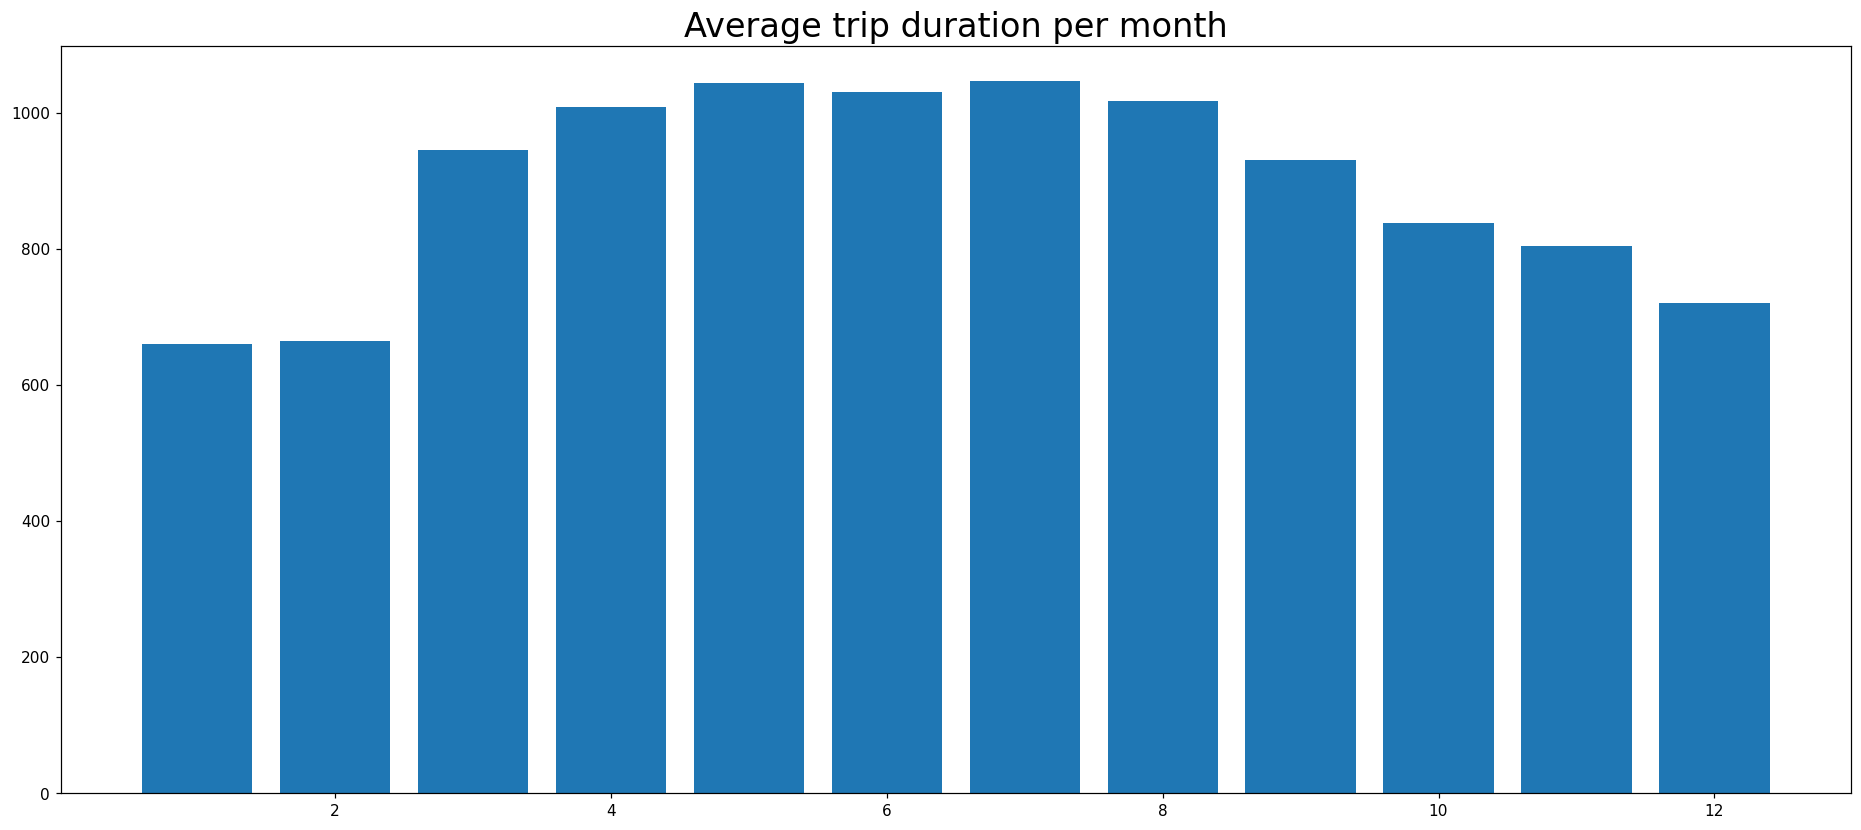

In [50]:
#Plot average trip duration per month
bostonC_kpi_duration = bostonC.groupby(["month"])["trip_duration"].mean()


fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.bar(bostonC_kpi_duration.index, bostonC_kpi_duration)
plt.title('Average trip duration per month',fontsize=22)

plt.show()

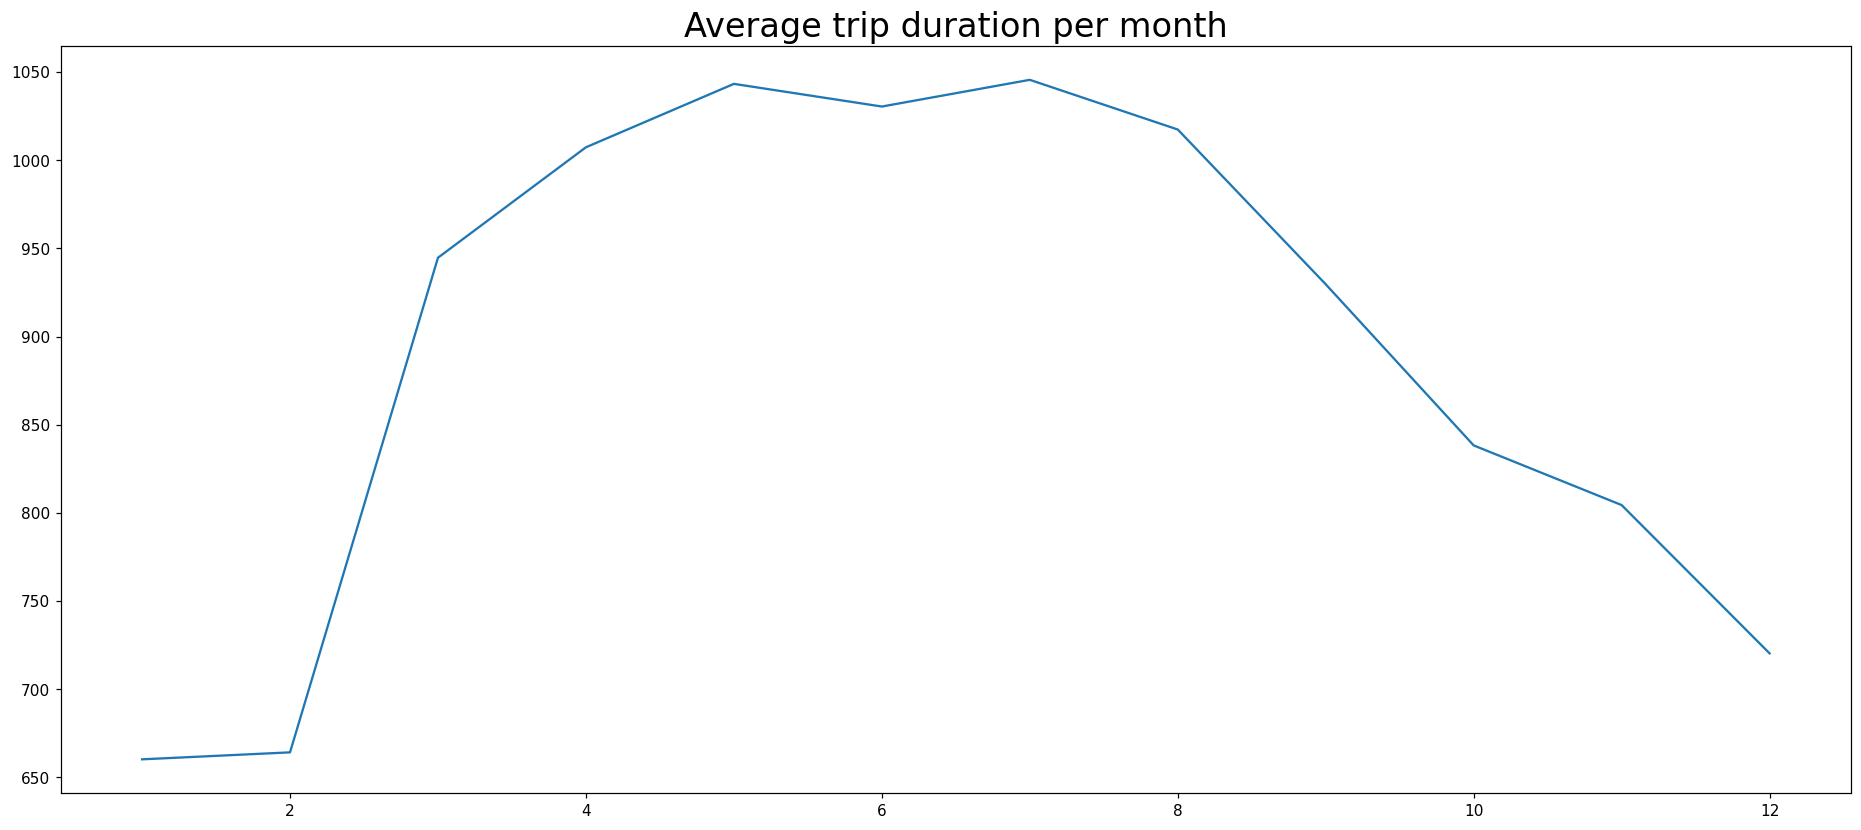

In [51]:
#The same data using a line graph
bostonC_kpi_duration = bostonC.groupby(["month"])["trip_duration"].mean()


fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.plot(bostonC_kpi_duration)
plt.title('Average trip duration per month',fontsize=22)
plt.show()

## We can see the trips are significantly longer in the warmer months of the year

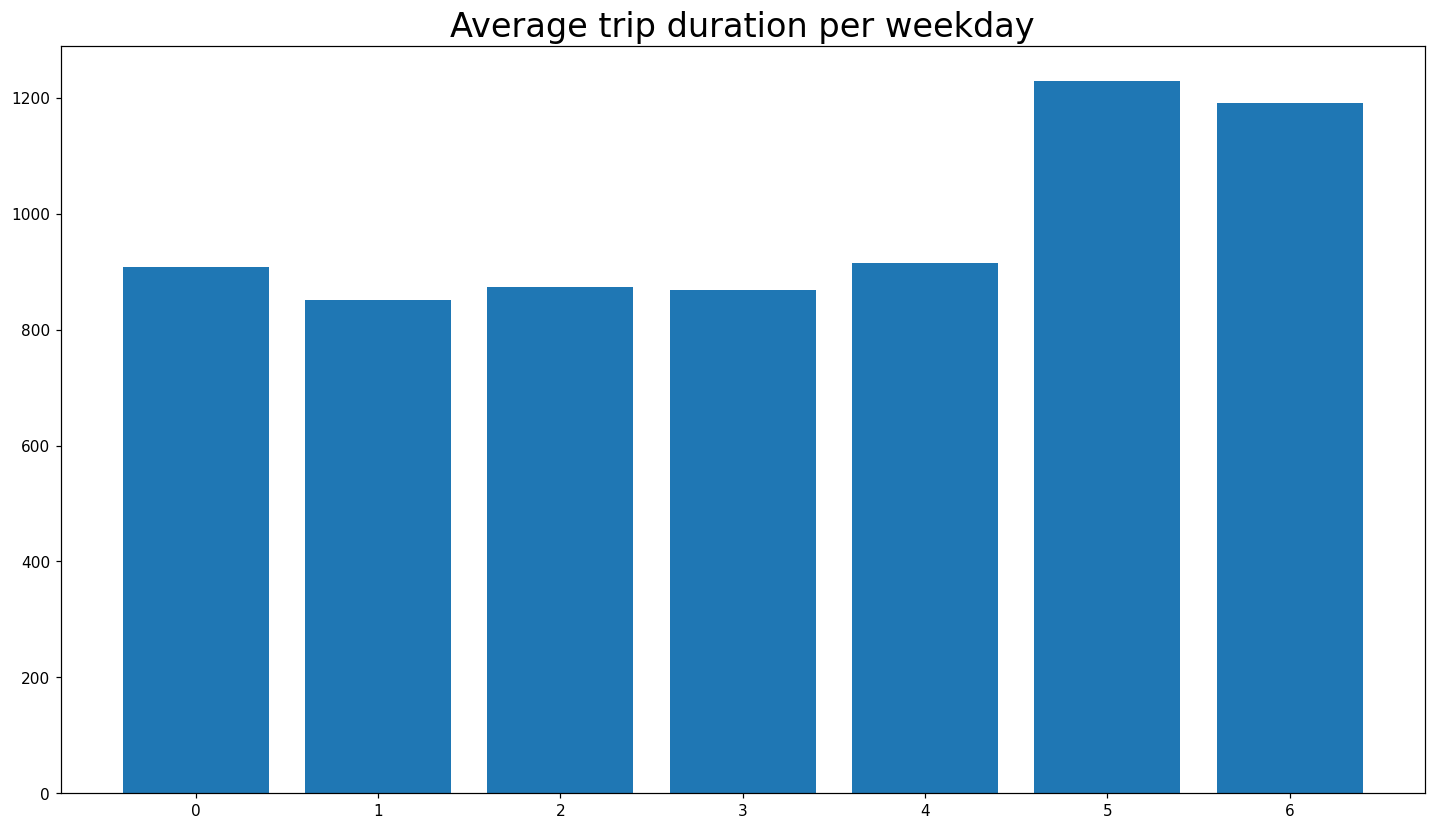

In [53]:
### weekdayly bike trips over the year (0 = Monday, 6 = Sunday)

bostonC_used = bostonC.groupby(["weekday"])["trip_duration"].mean()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)
plt.title('Average trip duration per weekday',fontsize=22)
plt.show()

## We notice that the trip duration rises by a good margin on Saturday and Sunday. This can be the result of people taking bikes to ride around the city for fun on the weekend, as oppose to Monday-Friday when more people use the bikes to run errands or go to work.